In [1]:
import pandas as pd

In [2]:
# -----------------------------
# Ethical Weights (adjustable)
# -----------------------------
weights = {
    "Human Harm": 0.5,
    "Probability": 0.3,
    "Legal Compliance": 0.2
}

In [3]:
# -----------------------------
# Scenario Action Data
# -----------------------------
actions = pd.DataFrame({
    "Scenario": [
        "Autonomous Vehicle Crash Choice",
        "Autonomous Vehicle Crash Choice",
        "Medical Treatment Allocation",
        "Medical Treatment Allocation"
    ],
    "Action": [
        "Brake",
        "Swerve",
        "Allocate Younger Patient",
        "Allocate First-Come"
    ],
    "Human Harm": [4, 3, 2, 3],          # hypothetical severity
    "Probability": [0.7, 0.6, 0.4, 0.5], # probability of harm
    "Legal Compliance": [1.0, 0.8, 0.9, 1.0]
})



In [4]:
# -----------------------------
# Compute Ethical Score
# -----------------------------
actions["Ethical Score"] = (
    actions["Human Harm"] * weights["Human Harm"] +
    actions["Probability"] * weights["Probability"] +
    actions["Legal Compliance"] * weights["Legal Compliance"]
)

print("=== Action Ethical Scores ===")
display(actions)


=== Action Ethical Scores ===


,Scenario,Action,Human Harm,Probability,Legal Compliance,Ethical Score
0,Autonomous Vehicle Crash Choice,Brake,4,0.7,1.0,2.41
1,Autonomous Vehicle Crash Choice,Swerve,3,0.6,0.8,1.84
2,Medical Treatment Allocation,Allocate Younger Patient,2,0.4,0.9,1.30
3,Medical Treatment Allocation,Allocate First-Come,3,0.5,1.0,1.85


In [5]:
# -----------------------------
# Automated Recommendation
# -----------------------------
recommendations = actions.loc[
    actions.groupby("Scenario")["Ethical Score"].idxmin()
]

print("\n=== Recommended Actions (Decision Support) ===")
display(recommendations)



=== Recommended Actions (Decision Support) ===


,Scenario,Action,Human Harm,Probability,Legal Compliance,Ethical Score
1,Autonomous Vehicle Crash Choice,Swerve,3,0.6,0.8,1.84
2,Medical Treatment Allocation,Allocate Younger Patient,2,0.4,0.9,1.30


In [6]:
# -----------------------------
# Explanation Log
# -----------------------------
def explain(row):
    return (
        f"Scenario: {row['Scenario']} → Recommended Action: {row['Action']} | "
        f"Score = {row['Ethical Score']:.2f} "
        f"(Harm={row['Human Harm']}, Prob={row['Probability']}, Legal={row['Legal Compliance']})"
    )

recommendations["Explanation"] = recommendations.apply(explain, axis=1)

print("\n=== Decision Explanation Log ===")
for exp in recommendations["Explanation"]:
    print(exp)


=== Decision Explanation Log ===
Scenario: Autonomous Vehicle Crash Choice → Recommended Action: Swerve | Score = 1.84 (Harm=3, Prob=0.6, Legal=0.8)
Scenario: Medical Treatment Allocation → Recommended Action: Allocate Younger Patient | Score = 1.30 (Harm=2, Prob=0.4, Legal=0.9)


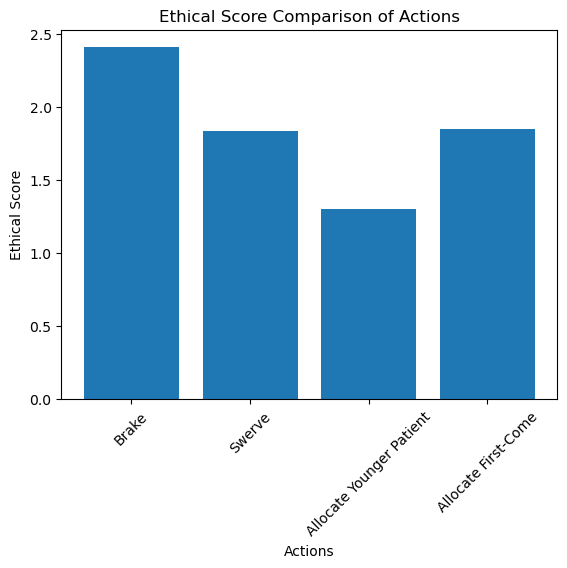

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ethical Weights
weights = {
    "Human Harm": 0.5,
    "Probability": 0.3,
    "Legal Compliance": 0.2
}

# Actions Dataset
actions = pd.DataFrame({
    "Scenario": [
        "Autonomous Vehicle Crash Choice",
        "Autonomous Vehicle Crash Choice",
        "Medical Treatment Allocation",
        "Medical Treatment Allocation"
    ],
    "Action": [
        "Brake",
        "Swerve",
        "Allocate Younger Patient",
        "Allocate First-Come"
    ],
    "Human Harm": [4, 3, 2, 3],
    "Probability": [0.7, 0.6, 0.4, 0.5],
    "Legal Compliance": [1.0, 0.8, 0.9, 1.0]
})

# Ethical Score Calculation
actions["Ethical Score"] = (
    actions["Human Harm"] * weights["Human Harm"] +
    actions["Probability"] * weights["Probability"] +
    actions["Legal Compliance"] * weights["Legal Compliance"]
)

# Plot (NO colors specified — academic safe)
plt.figure()
plt.bar(actions["Action"], actions["Ethical Score"])
plt.title("Ethical Score Comparison of Actions")
plt.xlabel("Actions")
plt.ylabel("Ethical Score")
plt.xticks(rotation=45)
plt.show()
